In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
from scipy import stats
import sys
import statsmodels.stats.multicomp as mc

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from placecellparams import Combinedplots as cp

In [3]:
DirectoryName = '/Users/seethakrishnan/Library/CloudStorage/Box-Box/CFC/ImagingData/'
CombinedFolder = '/Users/seethakrishnan/Library/CloudStorage/Box-Box/CFC/ImagingData/Placecellparams/'
SaveFigureFolder = '/Users/seethakrishnan/Library/CloudStorage/Box-Box/WorkingManuscripts/CFCBehavior/Plots/ImagingData/'

In [4]:
getdata = cp(FolderName=DirectoryName, CombinedDataFolder=CombinedFolder)

Index([126, 428, 442, 455, 535, 589], dtype='int64')
Index([   8,   11,   23,   25,   39,   86,  222,  747,  764,  778,  797,  798,
        800,  804,  807,  808,  813,  820,  882,  951, 1051, 1076, 1181],
      dtype='int64')
Index([8, 28, 30, 43, 57, 81, 180, 199, 224, 239, 268, 346, 412, 473, 534,
       865],
      dtype='int64')
Index([   1,   16,   74,  405,  450,  664, 1264, 1482, 1659, 1668, 1715, 1717,
       1733, 1809, 1817, 1827, 1858, 1912, 1984, 1987],
      dtype='int64')
['CFC3_placecellparams_df.csv', 'NR22_placecellparams_df.csv', 'CFC26_placecellparams_df.csv', 'DG10_placecellparams_df.csv']


Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 Task1  Task2 -0.6932 0.5141       1.0  False
 Task1  Task4 -0.5181 0.6229       1.0  False
 Task1  Task5 -0.8345  0.436       1.0  False
 Task2  Task4  0.2047 0.8446       1.0  False
 Task2  Task5 -0.1532 0.8833       1.0  False
 Task4  Task5 -0.3583 0.7324       1.0  False
---------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
 Task1  Task2 0.5351 0.6118       1.0  False
 Task1  Task4 0.8306  0.438       1.0  False
 Task1  Task5 5.0069 0.0024    0.0146   True
 Task2  Task4 0.5484 0.6032       1.0  False
 Task2  Task5   4.58 0.0038    0.0226   True
 Task4  Task5 1.8788 0.1093     0.656  False
----------------------------------------

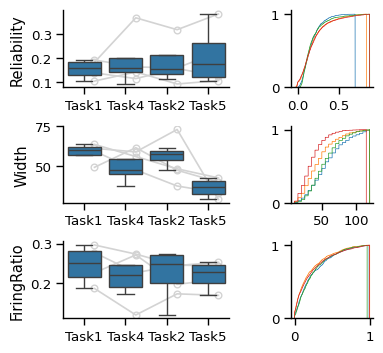

In [5]:
columns_to_plot = ['Reliability', 'Width', 'FiringRatio']
fs, ax = plt.subplots(len(columns_to_plot), 2, dpi=100, 
                      gridspec_kw={'width_ratios':[1, 0.5], 'wspace': 0.5, 'hspace': 0.5})

getdata.plot_pfparams(ax, tasks_to_plot=['Task1', 'Task4', 'Task2', 'Task5'], 
                      columns_to_plot=columns_to_plot, alltaskpresent=False)
sns.despine(fs)
fs.set_size_inches((4, 4))
fs.savefig(os.path.join(SaveFigureFolder, 'Placecellparams_CFC.pdf'), bbox_inches='tight')

## Remapping

Task1 (840, 40)
Task2 (939, 40)
Task3 (664, 40)
Task4 (1037, 40)
Task5 (1839, 40)


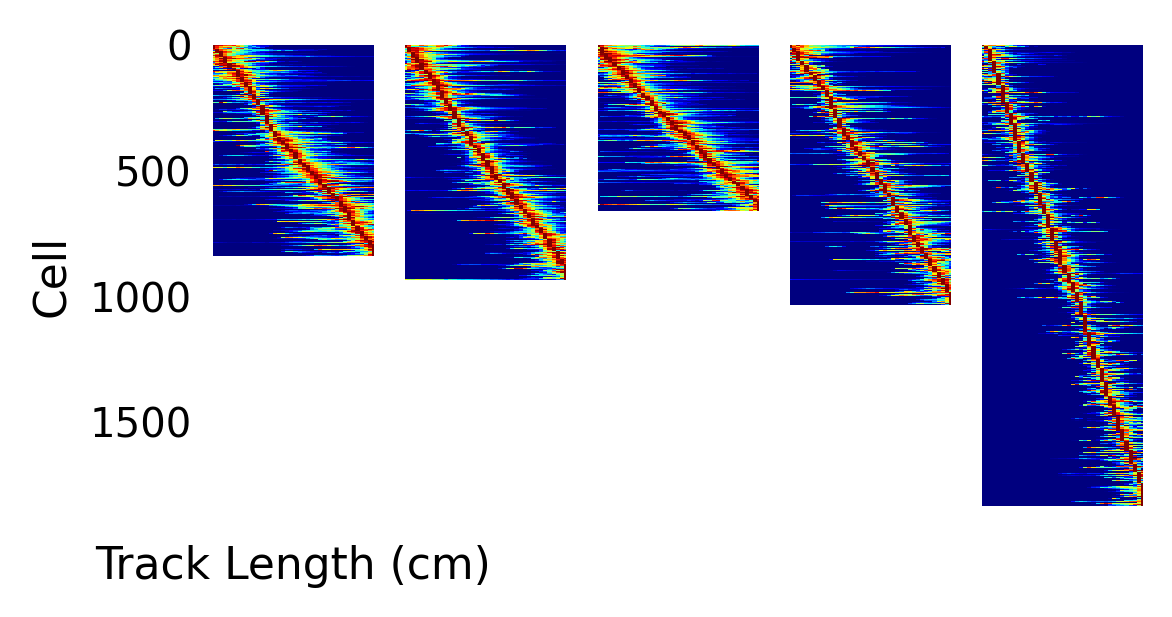

In [6]:
fs, ax = plt.subplots(1, 5, sharey='all', dpi=300)
numcell_tasks = getdata.combine_placecells_pertask(fs, 
    ax, taskstoplot=['Task1', 'Task2', 'Task3', 'Task4', 'Task5'])
for n, a in enumerate(ax):
    sns.despine(right=True, top=True, left=True, bottom=True, ax=a)
for a in ax:
    a.set_xticklabels('')
    a.set_title('')
fs.set_size_inches((4, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Placecells_pertask_heatmap.pdf'),  bbox_inches='tight', transparent=True)

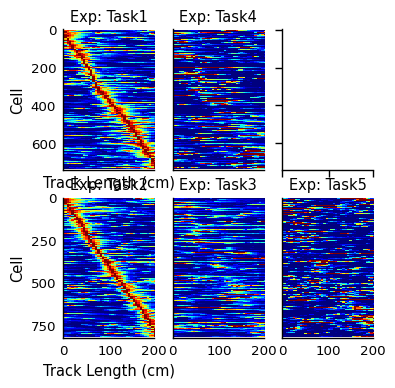

In [13]:
fs, ax = plt.subplots(2, 3, sharex='all', sharey='row', dpi=100)
pcactivity_control = getdata.combine_placecells_withtask(fs, ax[0, :], taskstoplot=['Task1', 'Task4'], tasktocompare='Task1')
pcactivity_cfc = getdata.combine_placecells_withtask(fs, ax[1, :], taskstoplot=['Task2', 'Task3', 'Task5'], tasktocompare='Task2')
sns.despine(fs)
fs.set_size_inches(4,4)
fs.savefig(os.path.join(SaveFigureFolder, 'Placecells_remapping_heatmap.pdf'),  bbox_inches='tight', transparent=True)

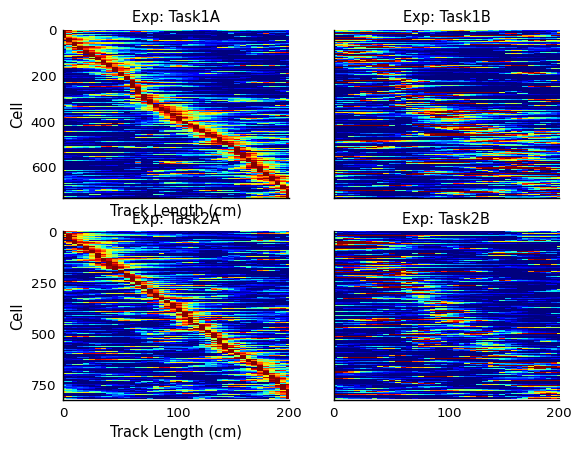

In [14]:
fs, ax = plt.subplots(2, 2, sharex='all', sharey='row', dpi=100)
pcactivity_withintask1 = getdata.combine_placecells_withtask(fs, ax[0, :], taskstoplot=['Task1A', 'Task1B'], tasktocompare='Task1', control_flag=True)
pcactivity_withintask2 = getdata.combine_placecells_withtask(fs, ax[1, :], taskstoplot=['Task2A', 'Task2B'], tasktocompare='Task2', control_flag=True)

In [17]:
c_control = getdata.trackcorrelation(pcactivity_control, basetask='Task1')
c_cfc = getdata.trackcorrelation(pcactivity_cfc, basetask='Task2')
c_withintask1 = getdata.trackcorrelation(pcactivity_withintask1, basetask='Task1A')
c_withintask2 = getdata.trackcorrelation(pcactivity_withintask2, basetask='Task2A')

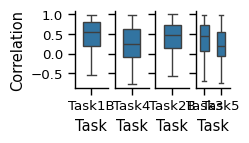

In [35]:
fs, ax = plt.subplots(1, 4, sharey='all')
for n, i in enumerate([c_withintask1, c_control, c_withintask2, c_cfc]):
    df = pd.DataFrame.from_dict(i)
    df = df.dropna()
    df = df.melt(var_name='Task', value_name='Correlation')
    sns.boxplot(x='Task', y='Correlation', data=df[~df['Task'].isin(['Task1', 'Task2', 'Task1A', 'Task2A'])], ax=ax[n], showfliers=False, width=0.5)
ax[0].locator_params(axis='y', nbins=4)
    
fs.set_size_inches((2, 1))
sns.despine(fs)
fs.savefig(os.path.join(SaveFigureFolder, 'Placecells_correlation.pdf'),  bbox_inches='tight', transparent=True)

CFC3_placecellparams_df.csv
NR22_placecellparams_df.csv
CFC26_placecellparams_df.csv
DG10_placecellparams_df.csv
CFC3_placecellparams_df.csv
NR22_placecellparams_df.csv
CFC26_placecellparams_df.csv
DG10_placecellparams_df.csv
CFC3_placecellparams_df.csv
NR22_placecellparams_df.csv
CFC26_placecellparams_df.csv
DG10_placecellparams_df.csv


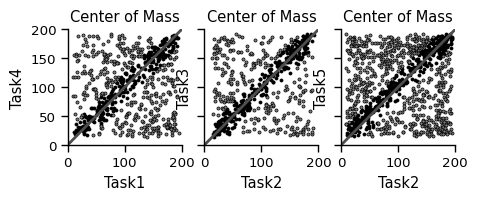

In [31]:
fs, ax = plt.subplots(1, 3, sharex='all', sharey='all')
a1 = getdata.get_com_allanimal(fs, ax[0], taskA='Task4', taskB='Task1')
a1 = getdata.get_com_allanimal(fs, ax[1], taskA='Task3', taskB='Task2')
a1 = getdata.get_com_allanimal(fs, ax[2], taskA='Task5', taskB='Task2')
fs.set_size_inches((5, 1.5))
sns.despine(fs)
fs.savefig(os.path.join(SaveFigureFolder, 'Placecells_centerofmass.pdf'),  bbox_inches='tight', transparent=True)

In [ ]:
fs, ax = plt.subplots(1)
getdata.plot_numcells(ax, numcell_tasks, taskstoplot=['Task1', 'Task4', 'Task2', 'Task5'])
fs.set_size_inches((2, 2))
sns.despine(fs)
fs.savefig(os.path.join(SaveFigureFolder, 'Placecells_percentage_pertask.pdf'),  bbox_inches='tight', transparent=True)